## Demo for learning dual channel PSF from SMLM data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='insitu',channeltype='2ch',sysfile='M2')

##### Edit user defined parameters

In [3]:
L.param.datapath = r'E:\EMBL files\data for PSF learning\190910_u2os_course_96_WGA_3D_M2\01_191009_u2os_course_96_WGA_3D_ritu_1/'
L.param.savename = L.param.datapath + 'psfmodel_iter'
L.param.keyword = 'Pos0.' # keyword of the file name or the full file name without extension
L.param.gain = 0.1
L.param.ccd_offset = 400
L.param.option.insitu.stage_pos = 0.5 # micron, stage position relative to infocus at the coverslip
L.param.ref_channel = 1 # choose the brighter channel as the reference channel, 0 or 1
L.param.roi.peak_height = 0.2 # relative to maximum bead intensity, bead intensity below which are rejected
L.param.option.insitu.min_photon: 0.2
L.param.batch_size = 1000 # lower this number if out of memory

Optional parameters, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell  
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{PSFtype}}$   | `'insitu_zernike', 'insitu_pupil'` | `'insitu_zernike'`
$\small\color{skyblue}{\mathrm{const\_pupilmag}}$ | `True`, `False` | `False`
$\small\color{skyblue}{\mathrm{mirrortype}}$   | `'up-down', 'left-right'` | `'up-down'`
$\small\color{skyblue}{\mathrm{channel\_arrange}}$   | `'up-down', 'left-right'` | `'up-down'`

$\small\color{skyblue}{\mathrm{init\_pupil\_file}}$ :  Full path to the .h5 file from bead PSF learning, Make sure the bead PSF varies in the correct axial direction, this usually requires setting the parameter $\small\color{skyblue}{\mathrm{stage\_mov\_dir}}$ to `'reverse'` during bead PSF learning

##### Start learning

In [4]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

E:\EMBL files\data for PSF learning\190910_u2os_course_96_WGA_3D_M2\01_191009_u2os_course_96_WGA_3D_ritu_1\01_191009_u2os_course_96_WGA_3D_ritu_1_MMStack_Pos0.ome.tif
(2, 2000, 234, 256)
rois shape channel 0: (20543, 21, 21)
rois shape channel 1: (12732, 21, 21)
rois shape channel 0: (6974, 21, 21)
rois shape channel 1: (6974, 21, 21)


4/6: calculating spline coefficients: 1/1 [00:01s]  1.50s/it total time: 1.49s
5/6: localization: 4/4 [00:00s] 12.07it/s total time: 1.82s
3/6: learning: 53/100 [00:26s]  2.01it/s, current loss: 1.47130, total time: 26.39s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.49s/it total time: 27.87s
5/6: localization: 4/4 [00:00s] 13.37it/s total time: 28.17s
3/6: learning: 51/100 [00:25s]  1.99it/s, current loss: 0.84219, total time: 52.02s
4/6: calculating spline coefficients: 2/2 [00:03s]  1.52s/it total time: 3.02s
5/6: localization: 4/4 [01:23s] 20.78s/it total time: 86.14s
c:\Users\Sheng\Documents\git\python\PSFLearning\demo\..\psflearning\learning\psfs\PSFMultiChannel_smlm_file.py:105: ComplexWarning: Casting complex values to real discards the imaginary part
  zp = locres[-1]['z'].flatten()+np.float32(self.sub_psfs[0].Zoffset.flatten())
3/6: learning: 229/250 [06:34s]  1.72s/it, current loss: 2.12275, total time: 446.83s


outlier percentage: 0.25184404636459434
rois shape channel 0: (1420, 21, 21)
rois shape channel 1: (1420, 21, 21)


3/6: learning: 199/250 [01:51s]  1.79it/s, current loss: 2.04873, total time: 558.29s
4/6: calculating spline coefficients: 2/2 [00:03s]  1.52s/it total time: 3.03s
5/6: localization: 4/4 [00:11s]  2.79s/it total time: 14.21s
6/6: saving results: [00:03s] total time: 17.50s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.51s/it total time: 1.50s
5/6: localization: 4/4 [00:00s]  7.51it/s total time: 2.03s
3/6: learning: 53/100 [00:43s]  1.21it/s, current loss: 1.47201, total time: 43.64s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.53s/it total time: 45.15s
5/6: localization: 4/4 [00:00s] 13.59it/s total time: 45.45s
3/6: learning: 55/100 [00:41s]  1.33it/s, current loss: 0.84200, total time: 84.86s
4/6: calculating spline coefficients: 2/2 [00:03s]  1.53s/it total time: 3.04s
5/6: localization: 4/4 [01:16s] 19.11s/it total time: 79.49s
3/6: learning: 175/250 [01:47s]  1.63it/s, current loss: 2.12077, total time: 192.44s


outlier percentage: 0.2527821939586645
rois shape channel 0: (1410, 21, 21)
rois shape channel 1: (1410, 21, 21)


3/6: learning: 136/250 [01:11s]  1.91it/s, current loss: 2.04964, total time: 263.61s
4/6: calculating spline coefficients: 2/2 [00:03s]  1.51s/it total time: 3.01s
5/6: localization: 4/4 [00:08s]  2.19s/it total time: 11.76s
6/6: saving results: [00:03s] total time: 15.03s


##### Show results

In [5]:
f,p = io.h5.load(resfile) # load result file

channel 0


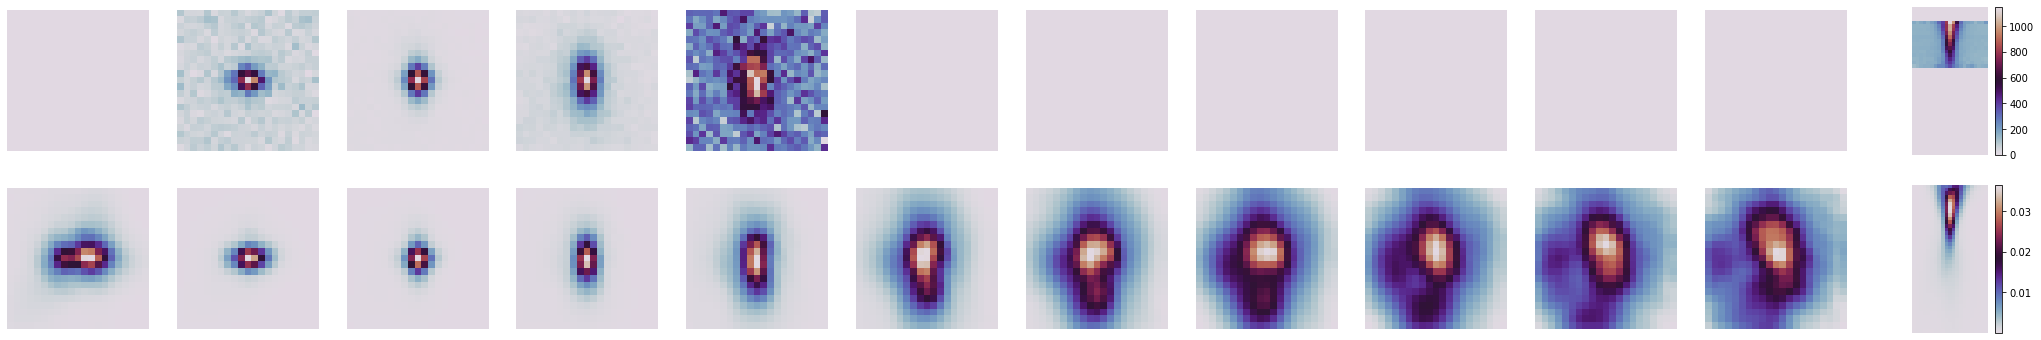

channel 1


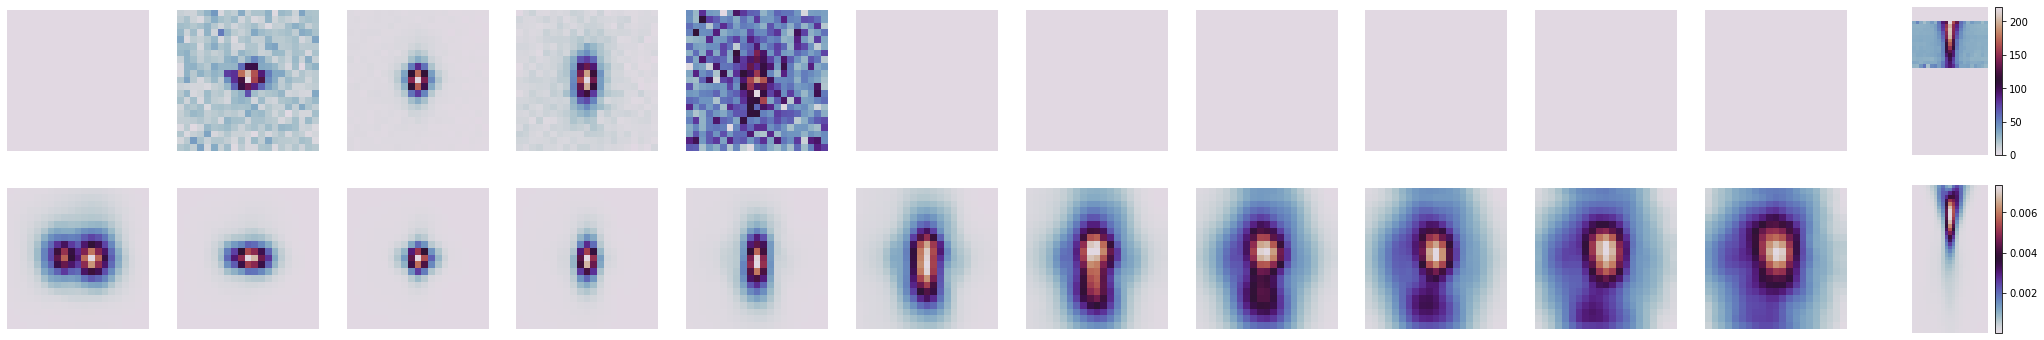

In [6]:
showpsfvsdata_insitu(f,p)

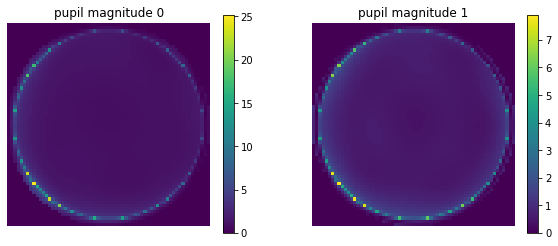

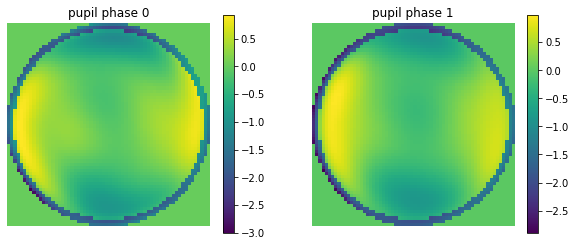

In [7]:
showpupil(f,p)

##### Optional plots

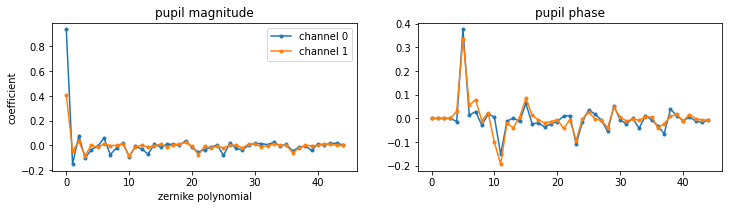

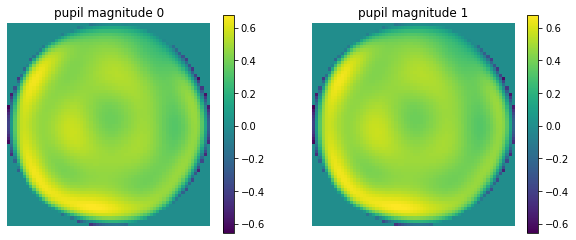

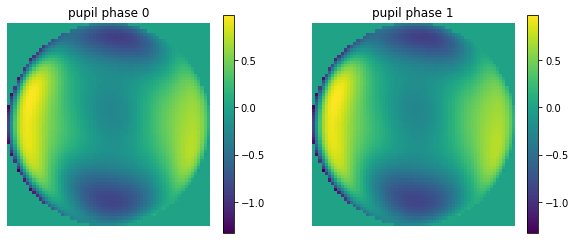

In [8]:
try:
    showzernike(f,p)
except:
    print('no Zernike coefficients')

[[ 0.9988 -0.0501  0.    ]
 [ 0.0502  0.9973  0.    ]
 [-2.6508  4.044   1.    ]]


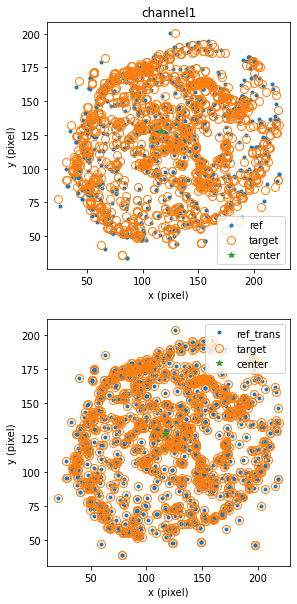

In [9]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

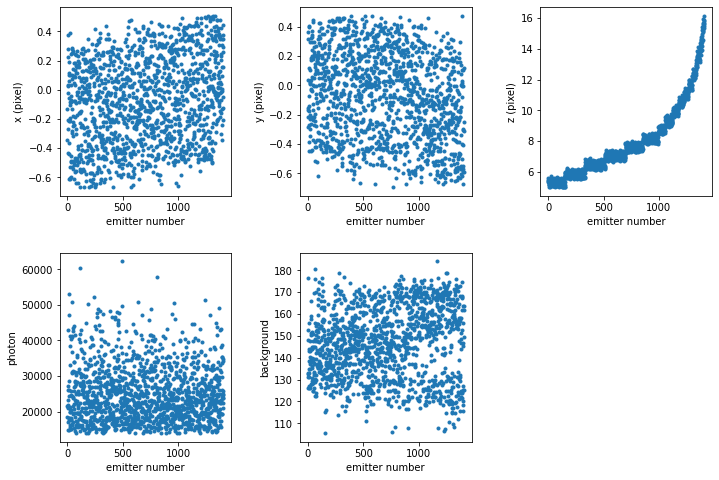

In [10]:
showlearnedparam_insitu(f,p)

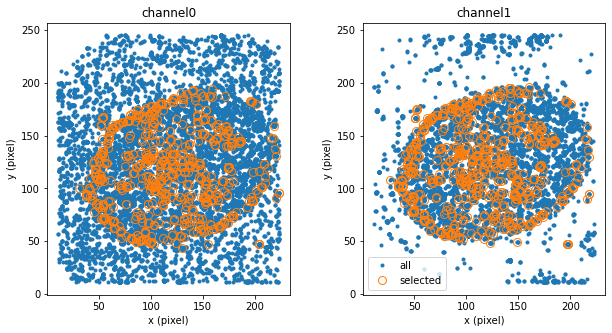

In [21]:
showcoord(f,p)